In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
plt.style.use('bmh')

In [13]:
df = pd.read_csv(r'Telco-Customer-Churn.csv')

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

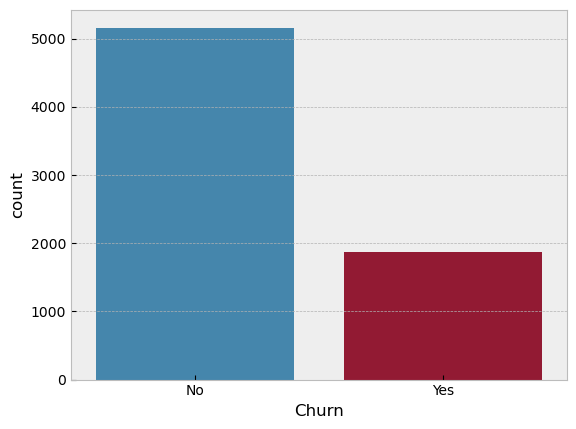

In [18]:
sns.countplot(x='Churn', data=df)

In [19]:
count_Yes = len(df[df['Churn']=='Yes'])
count_No = len(df[df['Churn']=='No'])

prc_of_Yes = count_Yes / (count_Yes + count_No)
print("Percentage of churning is:",round(prc_of_Yes*100,2),"%")

prc_of_No = count_No / (count_Yes + count_No)
print("Percentage of no churning is:",round(prc_of_No*100,2),"%")

Percentage of churning is: 26.58 %
Percentage of no churning is: 73.42 %


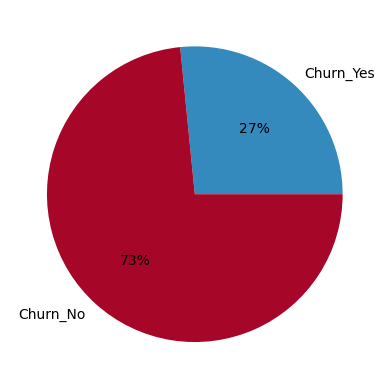

In [20]:
data = [26.58, 73.42]
labels = ['Churn_Yes', 'Churn_No']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

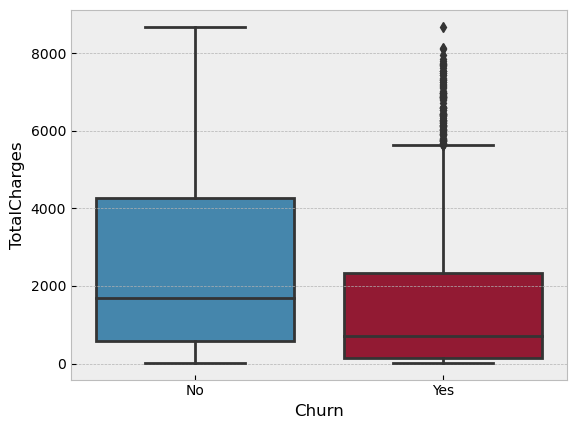

In [21]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

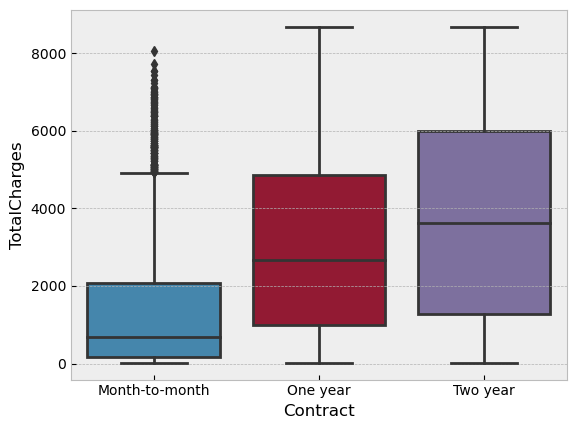

In [22]:
sns.boxplot(x='Contract', y='TotalCharges', data=df)

In [23]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

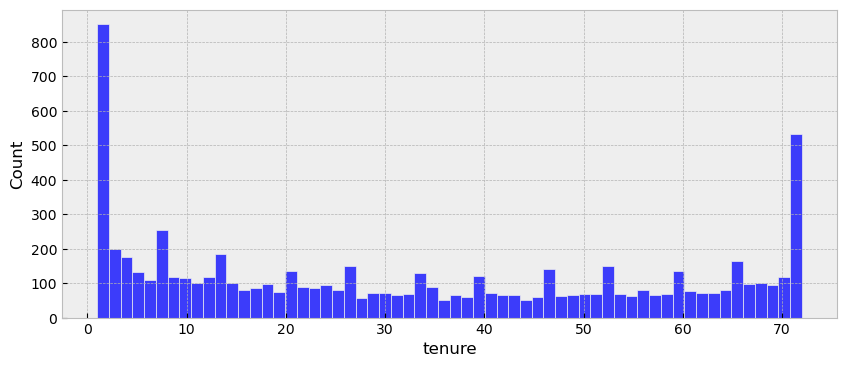

In [24]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='tenure', bins=60 )

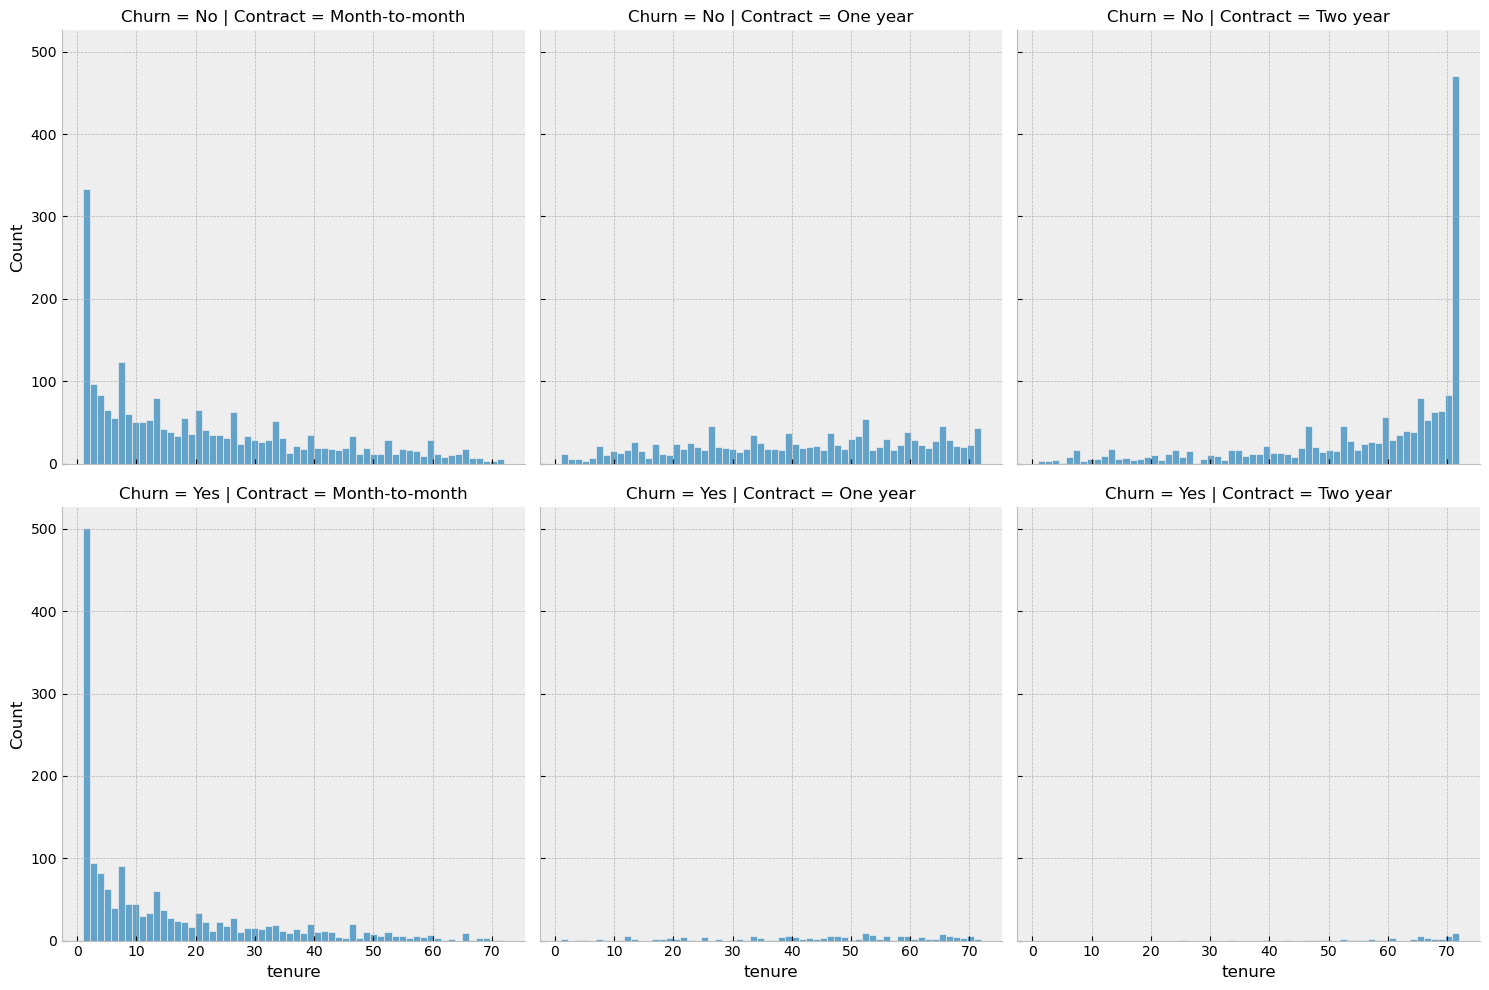

In [25]:
sns.displot(data=df, x='tenure', row='Churn', col='Contract', bins=60 )

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

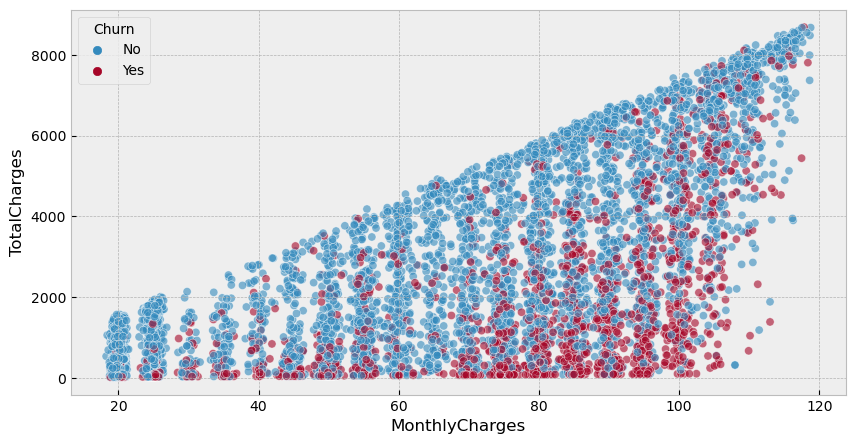

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.6)

In [27]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [28]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [29]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Text(0, 0.5, 'Churn rate')

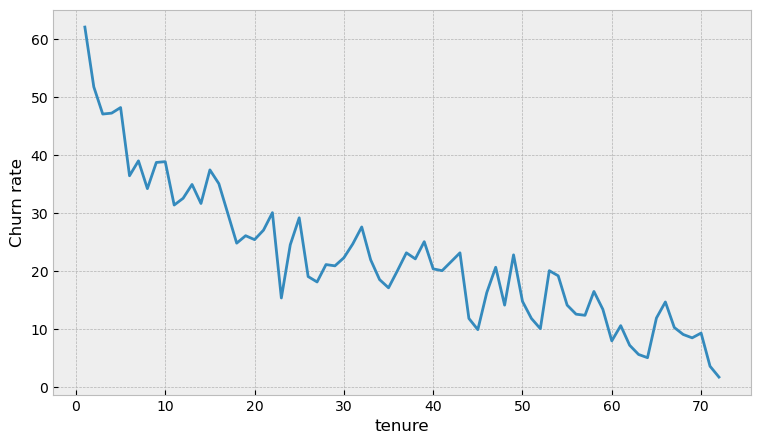

In [30]:
plt.figure(figsize=(9,5))
churn_rate.transpose()['customerID'].plot()
plt.ylabel('Churn rate')

In [31]:
def cohort(row):
    if row['tenure'] <= 12:
        val = '0-12 Months'
    elif (row['tenure'] > 12 and row['tenure'] <=24):
        val = '12-24 Months'
    elif (row['tenure'] > 24 and row['tenure'] <= 48):
        val = '24-48 Months'
    else:
        val = 'Over 48 Months'
        
    return val
    
df['Tenure Cohort'] = df.apply(cohort,axis=1)

In [32]:
df[['tenure','Tenure Cohort']]. head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

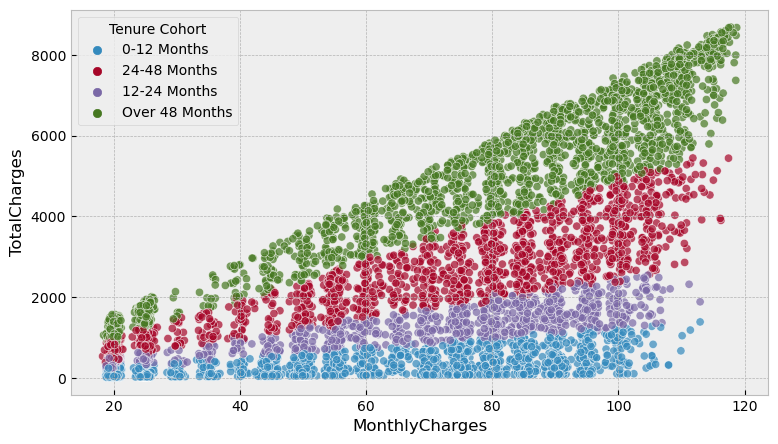

In [33]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.7)

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

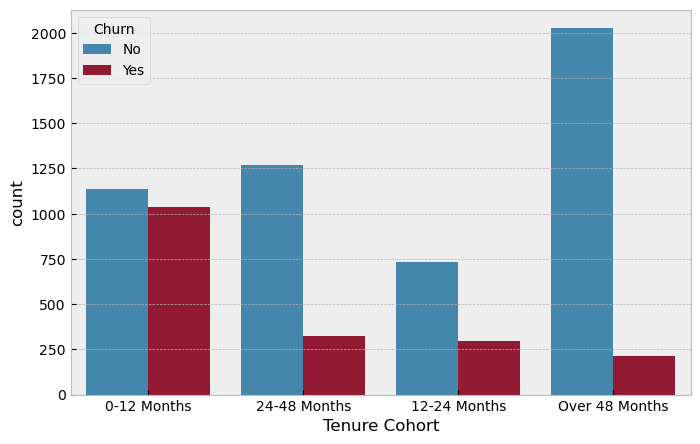

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

<Figure size 2000x800 with 0 Axes>

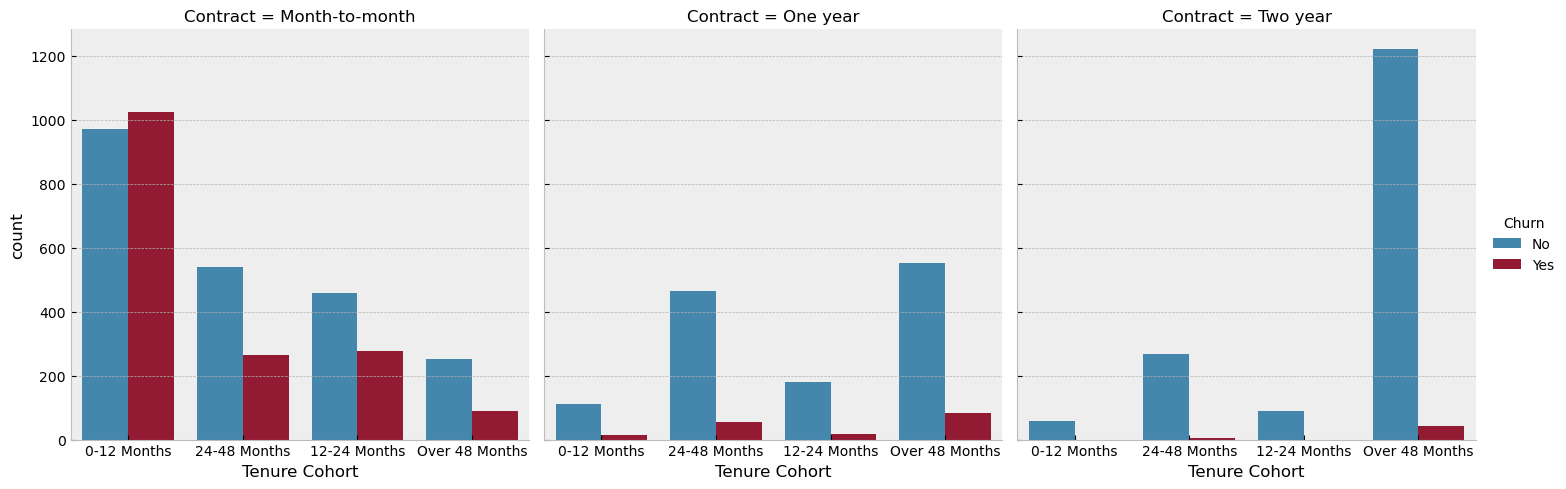

In [35]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')